# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.


This analysis randomly generated cities to compare maximum temperature in relation to the city's latitude. It has been proven in the following plots that maximum temperature and latitude has a strong correlation. For cities that are in the Northern Hemisphere, the data shows that there is a strong negative correlation which means that the closer the city is to the equator(0), the higher the maximum temperature and the further away from the equator(0), the lower the maximum temperature. For cities in the Southern Hemisphere, the data shows that there is a strong positive correlation which means that when a city is closer to the equator(0), the higher the maximum temperature and the further away from the equator(0), the lower the maximum temperature.

For the analysis on humidity in relation to latitude, there was not a correlation. However, when looking deeper in to the separate hemispheres, there seemed to be a slight correlation between humidity and latitude. For example, cities that are in the Northern Hemisphere have a slight positive correlation between humidity and latitude which means that for cities closer to the equator(0), the lower the humidity and the further away from the equator(0), the higher the humidity. Cities that are in the Southern Hemisphere have a positive correlation as well which means that the closer the city is to the equator(0), the higher the humidity and the further away from the equator(0), the lower the humidity.

The analysis of latitude versus wind speed has shown that there does not seem to be a correlation between the two. For cities that lie in the Northern Hemisphere, the analysis shows that there is a slight positive correlation between wind speed and latitude which means that the closer to the equator(0) that the city is, the lower the wind speed and the further away from the equator(0) that the city is, the higher the wind speed. For cities that lie in the Southern Hemisphere, the analysis shows that there is a negative correlation between wind speed and latitude which means that the closer to the equator(0) the city is, the lower the wind speed and the further away from the equator(0) the city is, the higher the wind speed.

## Generate Cities List

In [5]:
latitude_data = np.random.randint(low=-90, high=90, size=1600)
longitude_data = np.random.randint(low=-180, high=180, size=1600)

coordinates = list(zip(latitude_data, longitude_data))

cities = []
for coordinate in coordinates:
    lat, lon = coordinate
    city=citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then add it to the cities list:
    if city not in cities:
        cities.append(city)

print(len(cities))

652


In [6]:
# Set url for API
url = "http://api.openweathermap.org/data/2.5/weather?"

units = "imperial"

query_url=f'{url}appid={weather_api_key}&units={units}&q='

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
# Set empty lists
city_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

count=1

print('Beginning Data Retrieval')     
print('-----------------------------')

for city in cities:
        response=requests.get(query_url + city).json()
        
        print('Processing Record ' + str(count) + ' of ' + str(len(cities)) + ' | ' + city)
        
        try:
            city_name.append(response['name'])
            lat.append(response['coord']['lat'])
            lng.append(response['coord']['lon'])  
            max_temp.append(response['main']['temp_max'])
            humidity.append(response['main']['humidity'])  
            cloudiness.append(response['clouds']['all'])
            wind_speed.append(response['wind']['speed'])   
            country.append(response['sys']['country'])
            date.append(response['dt'])     
    
        except KeyError:
            
            print(city + ' City not found. Skipping...') 
            
        count=count+1

Beginning Data Retrieval
-----------------------------
Processing Record 1 of 652 | manokwari
Processing Record 2 of 652 | vaini
Processing Record 3 of 652 | cidreira
Processing Record 4 of 652 | opuwo
Processing Record 5 of 652 | mar del plata
Processing Record 6 of 652 | georgetown
Processing Record 7 of 652 | borodino
Processing Record 8 of 652 | khatanga
Processing Record 9 of 652 | aldama
Processing Record 10 of 652 | kuche
kuche City not found. Skipping...
Processing Record 11 of 652 | ushuaia
Processing Record 12 of 652 | hobart
Processing Record 13 of 652 | avarua
Processing Record 14 of 652 | airai
Processing Record 15 of 652 | tiksi
Processing Record 16 of 652 | yangambi
Processing Record 17 of 652 | deputatskiy
Processing Record 18 of 652 | yellowknife
Processing Record 19 of 652 | attawapiskat
attawapiskat City not found. Skipping...
Processing Record 20 of 652 | kidal
Processing Record 21 of 652 | upington
Processing Record 22 of 652 | avera
Processing Record 23 of 652 | n

Processing Record 192 of 652 | zhangye
Processing Record 193 of 652 | grand river south east
grand river south east City not found. Skipping...
Processing Record 194 of 652 | grenfell
Processing Record 195 of 652 | teacapan
Processing Record 196 of 652 | constitucion
Processing Record 197 of 652 | bonavista
Processing Record 198 of 652 | eureka
Processing Record 199 of 652 | kunming
Processing Record 200 of 652 | caravelas
Processing Record 201 of 652 | belushya guba
belushya guba City not found. Skipping...
Processing Record 202 of 652 | buta
Processing Record 203 of 652 | den helder
Processing Record 204 of 652 | yeppoon
Processing Record 205 of 652 | kokstad
Processing Record 206 of 652 | barentsburg
barentsburg City not found. Skipping...
Processing Record 207 of 652 | port-gentil
Processing Record 208 of 652 | karkaralinsk
karkaralinsk City not found. Skipping...
Processing Record 209 of 652 | jatara
Processing Record 210 of 652 | nokaneng
Processing Record 211 of 652 | santa cata

Processing Record 376 of 652 | maningrida
Processing Record 377 of 652 | samarai
Processing Record 378 of 652 | hambantota
Processing Record 379 of 652 | akyab
Processing Record 380 of 652 | bozuyuk
Processing Record 381 of 652 | puerto colombia
Processing Record 382 of 652 | santa helena de goias
Processing Record 383 of 652 | ponta do sol
Processing Record 384 of 652 | novolabinskaya
Processing Record 385 of 652 | taunggyi
Processing Record 386 of 652 | bolungarvik
bolungarvik City not found. Skipping...
Processing Record 387 of 652 | krasnoselkup
Processing Record 388 of 652 | san cristobal
Processing Record 389 of 652 | wanaka
Processing Record 390 of 652 | ponto novo
Processing Record 391 of 652 | erenhot
Processing Record 392 of 652 | sibolga
Processing Record 393 of 652 | boke
Processing Record 394 of 652 | leshukonskoye
Processing Record 395 of 652 | fort nelson
Processing Record 396 of 652 | rio grande
Processing Record 397 of 652 | richmond
Processing Record 398 of 652 | gbar

Processing Record 567 of 652 | camopi
Processing Record 568 of 652 | syamzha
Processing Record 569 of 652 | tula
Processing Record 570 of 652 | marti
Processing Record 571 of 652 | ruteng
Processing Record 572 of 652 | havelock
Processing Record 573 of 652 | tukan
Processing Record 574 of 652 | kota tinggi
Processing Record 575 of 652 | mayo
Processing Record 576 of 652 | jatai
Processing Record 577 of 652 | simbahan
Processing Record 578 of 652 | tsimlyansk
Processing Record 579 of 652 | rehoboth
Processing Record 580 of 652 | marsaxlokk
Processing Record 581 of 652 | naze
Processing Record 582 of 652 | menongue
Processing Record 583 of 652 | sisimiut
Processing Record 584 of 652 | andenes
Processing Record 585 of 652 | biak
Processing Record 586 of 652 | scottsburgh
scottsburgh City not found. Skipping...
Processing Record 587 of 652 | port hueneme
Processing Record 588 of 652 | kenai
Processing Record 589 of 652 | hvammstangi
hvammstangi City not found. Skipping...
Processing Record

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
weather_dict = {
    "City": city_name,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Manokwari,-0.8667,134.0833,82.42,71,100,1.12,ID,1619831565
1,Vaini,-21.2000,-175.2000,78.80,89,75,12.66,TO,1619831277
2,Cidreira,-30.1811,-50.2056,68.79,71,0,16.96,BR,1619831474
3,Opuwo,-18.0607,13.8400,68.90,37,57,5.12,NA,1619831565
4,Mar del Plata,-38.0023,-57.5575,63.00,77,0,10.36,AR,1619831306
5,George Town,5.4112,100.3354,78.80,94,20,4.61,MY,1619831043
6,Borodino,55.9106,94.8983,44.20,71,77,6.82,RU,1619831566
7,Khatanga,71.9667,102.5000,33.42,88,100,10.27,RU,1619831278
8,Aldama,22.9167,-98.0667,84.99,85,60,11.01,MX,1619831567
9,Ushuaia,-54.8000,-68.3000,37.40,93,20,2.30,AR,1619831567


In [9]:
weather_data = weather_data.dropna(how='any')

In [10]:
weather_data.to_csv("Output/weather_data.csv", index=False, header=True)

In [11]:
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,597.000000,597.000000,597.000000,597.000000,597.000000,597.000000,5.970000e+02
mean,20.798748,20.083304,61.302462,69.552764,53.209380,7.476533,1.619832e+09
std,32.734027,90.889389,18.390296,21.830401,41.100157,5.250121,1.043332e+02
min,-54.800000,-179.166700,12.200000,1.000000,0.000000,0.160000,1.619831e+09
25%,-7.470600,-59.516700,46.990000,57.000000,7.000000,3.440000,1.619832e+09
50%,26.557900,22.224700,65.550000,73.000000,59.000000,6.150000,1.619832e+09
75%,47.666600,103.460900,77.000000,87.000000,99.000000,10.420000,1.619832e+09
max,78.218600,179.316700,91.990000,100.000000,100.000000,28.810000,1.619832e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [13]:
#  Get the indices of cities that have humidity over 100%.

In [14]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


Max Temp is equal to 100%, therefore there are no cities with a max temperature higher than 100%.

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

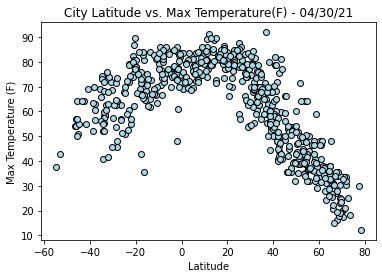

In [88]:
# Create a Scatter Plot for temperature vs latitude
x_values = weather_data['Lat']
y_values = weather_data['Max Temp']
plt.scatter(x_values,y_values, facecolors="lightblue", edgecolors="black")
plt.title('City Latitude vs. Max Temperature(F) - 04/30/21')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig('Output/City Latitude vs. Max Temp.png')
plt.show()

This plot, City Latitude vs. Max Temperature, shows the maximum temperature of randomly generated cities in relation to their latitude or their distance away from the equator(0). This plot shows that there is a strong correlation between temperature and latitude for both northern and southern hemispheres. There is a higher average max temperature in the southern latitude with the highest max temperatures near the equator and the lowest max temperatures in the northern hemisphere.

## Latitude vs. Humidity Plot

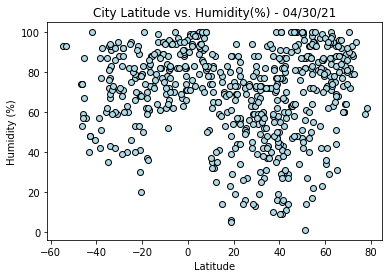

In [87]:
# Create a Scatter Plot for Humidity vs latitude
x_values = weather_data['Lat']
y_values = weather_data['Humidity']
plt.scatter(x_values,y_values, facecolors="lightblue", edgecolors="black")
plt.title('City Latitude vs. Humidity(%) - 04/30/21')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('Output/City Latitude vs. Humidity.png')
plt.show()

This plot, City Latitude vs. Humidity, shows the percentage of humidity of randomly generated cities in relation to their latitude. This plot shows that humidity is spread out between the hemispheres, however, there is more humidity close to the equator(0) and in the northern hemisphere.

## Latitude vs. Cloudiness Plot

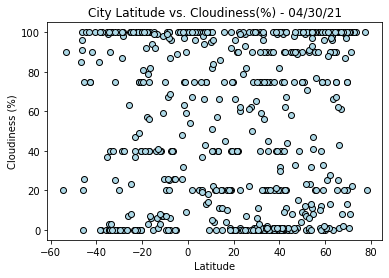

In [86]:
# Create a Scatter Plot for Cloudiness vs latitude
x_values = weather_data['Lat']
y_values = weather_data['Cloudiness']
plt.scatter(x_values,y_values, facecolors="lightblue", edgecolors="black")
plt.title('City Latitude vs. Cloudiness(%) - 04/30/21')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('Output/City Latitude vs. Cloudiness.png')
plt.show()

This plot, City Latitude vs. Cloudiness, shows the percentage of cloudiness of randomly generated cities in relation to their latitude. This plot shows that there does not seem to be a correlation between cloudiness and city latitude.

## Latitude vs. Wind Speed Plot

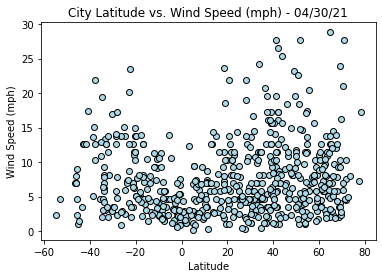

In [84]:
# Create a Scatter Plot for Wind Speed vs latitude
x_values = weather_data['Lat']
y_values = weather_data['Wind Speed']
plt.scatter(x_values,y_values, facecolors="lightblue", edgecolors="black")
plt.title('City Latitude vs. Wind Speed (mph) - 04/30/21')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig('Output/City Latitude vs. Wind Speed.png')
plt.show()

This plot, City Latitude vs. Wind Speed, shows wind speed(mph) of randomly generated cities in relation to their latitude. This plot shows that there does not seem to be a correlation between wind speed and latitude. It is interesting to note that the highest reported wind speed lies in the northern hemisphere.

## Linear Regression

In [19]:
northern_hemisphere = weather_data.loc[weather_data["Lat"] >= 0]
northern_hemisphere

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
5,George Town,5.4112,100.3354,78.80,94,20,4.61,MY,1619831043
6,Borodino,55.9106,94.8983,44.20,71,77,6.82,RU,1619831566
7,Khatanga,71.9667,102.5000,33.42,88,100,10.27,RU,1619831278
8,Aldama,22.9167,-98.0667,84.99,85,60,11.01,MX,1619831567
13,Tiksi,71.6872,128.8694,30.52,89,22,4.50,RU,1619831568
...,...,...,...,...,...,...,...,...,...
591,Ndélé,8.4109,20.6473,79.92,50,100,6.78,CF,1619831773
592,Kolda,12.8833,-14.9500,89.60,35,57,6.91,SN,1619831630
594,Marsh Harbour,26.5412,-77.0636,77.81,73,22,5.06,BS,1619831774
595,Ust'-Karsk,52.7011,118.8077,49.78,47,6,2.93,RU,1619831774


In [20]:
southern_hemisphere = weather_data.loc[weather_data["Lat"] <0]
southern_hemisphere

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Manokwari,-0.8667,134.0833,82.42,71,100,1.12,ID,1619831565
1,Vaini,-21.2000,-175.2000,78.80,89,75,12.66,TO,1619831277
2,Cidreira,-30.1811,-50.2056,68.79,71,0,16.96,BR,1619831474
3,Opuwo,-18.0607,13.8400,68.90,37,57,5.12,NA,1619831565
4,Mar del Plata,-38.0023,-57.5575,63.00,77,0,10.36,AR,1619831306
...,...,...,...,...,...,...,...,...,...
578,Crixás,-14.5489,-49.9692,73.09,76,92,4.83,BR,1619831769
580,Alofi,-19.0595,-169.9187,75.20,100,100,4.61,NU,1619831770
581,Inongo,-1.9500,18.2667,72.66,91,100,4.56,CD,1619831770
585,Gold Coast,-28.0000,153.4333,73.40,60,40,17.27,AU,1619831549


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7863634325431548


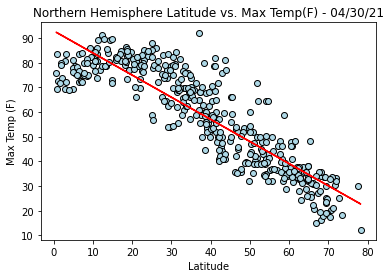

In [83]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Max Temp']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values, facecolors="lightblue", edgecolors="black")

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2,6),fontsize=15,color="red")

#titles
plt.title('Northern Hemisphere Latitude vs. Max Temp(F) - 04/30/21')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')

# Print r value
print(f"The r-value is: {rvalue**2}")

#save png
plt.savefig('Output/Northern Latitude vs. Max Temp.png')

#show
plt.show()

This plot, Northern Hemisphere Latitude vs. Max Temp(F), shows the maximum temperature of randomly generated northern hemisphere cities in relation to their latitude. This plot shows that there is a strong negative correlation between maximum temperature and latitude for cities in the northern hemisphere. The closer to the equator(0), the higher the maximum temperature and the further away from the equator(0), the lower the maximum temperature.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.3881052247871621


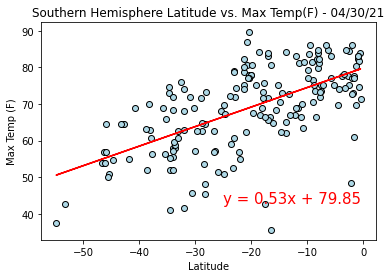

In [82]:
# Create a Scatter Plot for Wind Speed vs latitude
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Max Temp']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values, facecolors="lightblue", edgecolors="black")

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (-25,43), fontsize=15, color="red")

#titles
plt.title('Southern Hemisphere Latitude vs. Max Temp(F) - 04/30/21')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')

# Print r value
print(f"The r-value is: {rvalue**2}")

#save png
plt.savefig('Output/Southern Latitude vs. Max Temp.png')

#show
plt.show()

This plot, Southern Hemisphere Latitude vs. Max Temp(F), shows the maximum temperature of randomly generated southern hemisphere cities in relation to their latitude. This plot shows that there is a positive correlation between maximum temperature and latitude for cities in the southern hemisphere. The closer to the equator(0), the higher the maximum temperature and the further away from the equator(0), the lower the maximum temperature.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.012250022191389261


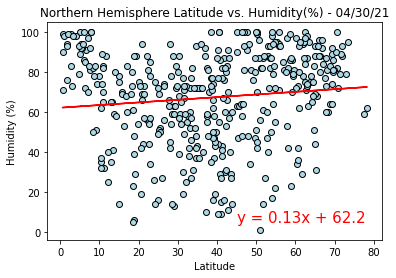

In [81]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Humidity']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values, facecolors="lightblue", edgecolors="black")

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45, 5),fontsize=15,color="red")

#titles
plt.title('Northern Hemisphere Latitude vs. Humidity(%) - 04/30/21')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Print r value
print(f"The r-value is: {rvalue**2}")

#save png
plt.savefig('Output/Northern Latitude vs. Humidity.png')

#show
plt.show()

This plot, Northern Hemisphere Latitude vs. Humidity(%), shows the percentage of humidity of randomly generated northern hemisphere cities in relation to their latitude. This plot shows that there is a slight positive correlation between humidity and latitude for cities in the northern hemisphere. The closer to the equator(0), the lower the humidity and the further away from the equator(0), the higher the humidity.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.07139083307941353


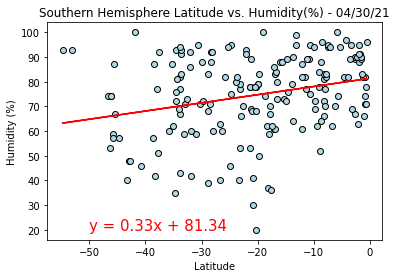

In [80]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Humidity']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values, facecolors="lightblue", edgecolors="black")

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")

#titles
plt.title('Southern Hemisphere Latitude vs. Humidity(%) - 04/30/21')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Print r value
print(f"The r-value is: {rvalue**2}")

#save png
plt.savefig('Output/Southern Latitude vs. Humidity.png')

#show
plt.show()

This plot, Southern Hemisphere Latitude vs. Humidity(%), shows the percentage of humidity of randomly generated southern hemisphere cities in relation to their latitude. This plot shows that there is a positive correlation between humidity and latitude for cities in the southern hemisphere. The closer to the equator(0), the higher the humidity and the further away from the equator(0), the lower the humidity.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.014835063223699978


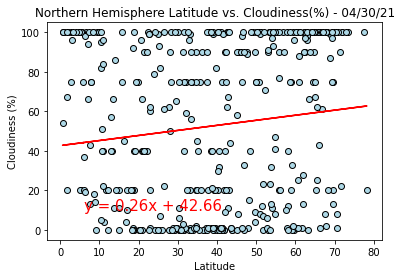

In [89]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Cloudiness']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values, facecolors="lightblue", edgecolors="black")

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

#titles
plt.title('Northern Hemisphere Latitude vs. Cloudiness(%) - 04/30/21')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Print r value
print(f"The r-value is: {rvalue**2}")

#save png
plt.savefig('Output/Northern Latitude vs. Cloudiness.png')

#show
plt.show()

This plot, Northern Hemisphere Latitude vs. Cloudiness(%), shows the percentage of cloudiness of randomly generated northern hemisphere cities in relation to their latitude. This plot shows that there is a slight positive correlation between cloudiness and latitude for cities in the northern hemisphere. The closer to the equator(0), the lower the cloudiness and the further away from the equator(0), the higher the cloudiness.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.006723392398855737


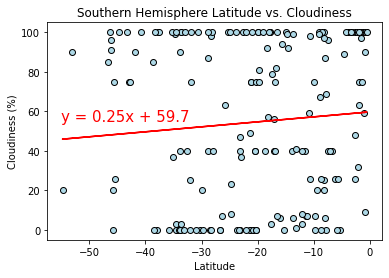

In [68]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Cloudiness']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values, facecolors="lightblue", edgecolors="black")

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,55),fontsize=15,color="red")

#titles
plt.title('Southern Hemisphere Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Print r value
print(f"The r-value is: {rvalue**2}")

#save png
plt.savefig('Output/Southern Latitude vs. Cloudiness.png')

#show
plt.show()

This plot, Southern Hemisphere Latitude vs. Cloudiness(%), shows the percentage of cloudiness of randomly generated southern hemisphere cities in relation to their latitude. This plot shows that there is a positive correlation between cloudiness and latitude for cities in the southern hemisphere. The closer to the equator(0), the higher the cloudiness and the further away from the equator(0), the lower the cloudiness.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.03559530818635828


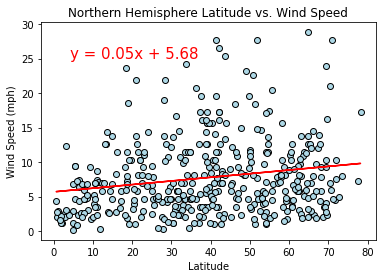

In [69]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Wind Speed']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values, facecolors="lightblue", edgecolors="black")

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(4,25),fontsize=15,color="red")

#titles
plt.title('Northern Hemisphere Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Print r value
print(f"The r-value is: {rvalue**2}")

#save png
plt.savefig('Output/Northern Latitude vs. Wind Speed.png')

#show
plt.show()

This plot, Northern Hemisphere Latitude vs. Wind Speed(mph), shows the wind speed(mph) of randomly generated northern hemisphere cities in relation to their latitude. This plot shows that there is a positive correlation between wind speed and latitude for cities in the northern hemisphere. The closer to the equator(0), the lower the wind speed and the further away from the equator(0), the higher the wind speed.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0951429106143316


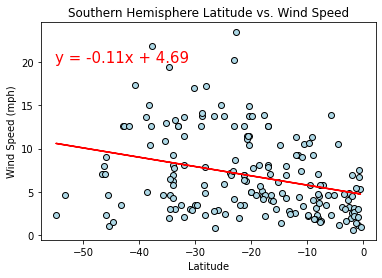

In [70]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Wind Speed']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values, facecolors="lightblue", edgecolors="black")

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")

#titles
plt.title('Southern Hemisphere Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Print r value
print(f"The r-value is: {rvalue**2}")

#save png
plt.savefig('Output/Southern Latitude vs. Wind Speed.png')

#show
plt.show()

This plot, Southern Hemisphere Latitude vs. Wind Speed(mph), shows the wind speed(mph) of randomly generated southern hemisphere cities in relation to their latitude. This plot shows that there is a negative correlation between wind speed and latitude for cities in the southern hemisphere. The closer to the equator(0), the lower the wind speed and the further away from the equator(0), the higher the wind speed.